In [1]:
import string
import seaborn as sns
import pandas
import numpy
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

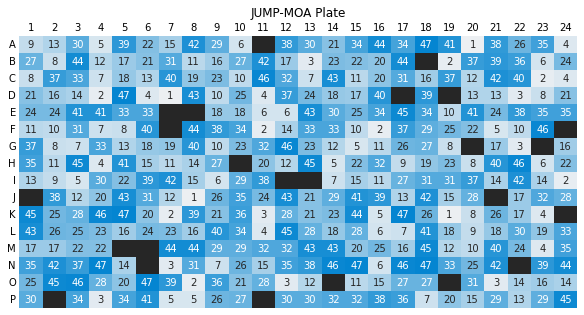

In [2]:
df = pandas.read_csv('../profiles-pilots/metadata/JUMP-MOA_compound_platemap_with_metadata.csv')
df = df.fillna('null')
moa_column = numpy.array(df['moa'])

moa_plate = moa_column.reshape([16,24])

moas = list(numpy.unique(moa_plate))
moas.sort()
moas.remove('null')
moas = ['null']+moas
for eachmoa in range(len(moas)):
    moa_plate = numpy.where(moa_plate == moas[eachmoa],eachmoa,moa_plate)
moa_plate = moa_plate.astype('uint8')

Rows = list(string.ascii_uppercase)[:16]
plate_df_dict = {}
for eachcol in range(24):
    plate_df_dict[eachcol+1] = moa_plate[:,eachcol]
plate_df_dict['Rows']=Rows

plate_df = pandas.DataFrame(plate_df_dict)
plate_df = plate_df.set_index('Rows')

moa_with_DMSO = numpy.where(moa_plate == 0,'',moa_plate.astype('str'))

# thanks to https://stackoverflow.com/questions/31051488/combining-two-matplotlib-colormaps
cmap0 = sns.dark_palette("black",input='xkcd',as_cmap=True)
colors0 = cmap0(numpy.linspace(0., 1, 1))
cmap1 = sns.light_palette("cerulean",input='xkcd',as_cmap=True)
colors1 = cmap1(numpy.linspace(0., 1, 255))
colors = numpy.vstack((colors0, colors1))
cmap = mcolors.LinearSegmentedColormap.from_list('cmap', colors)

fig, ax = plt.subplots(figsize=(10, 5))
g = sns.heatmap(plate_df,cmap=cmap,cbar=False,ax=ax,annot=moa_with_DMSO,fmt='')
g.set_yticklabels(g.get_yticklabels(), rotation=0, horizontalalignment='right')
g.set_ylabel('')
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
ax.tick_params(length=0)
ax.set_title('JUMP-MOA Plate')
plt.savefig('../figures/JUMP-MOA.png',dpi=300)

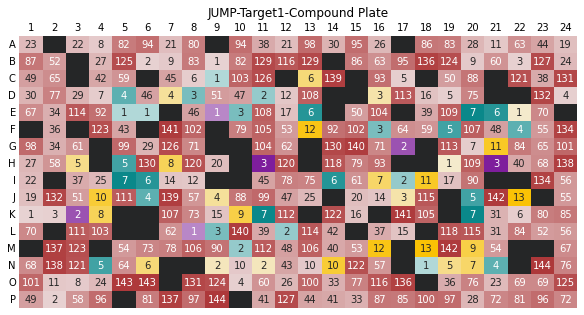

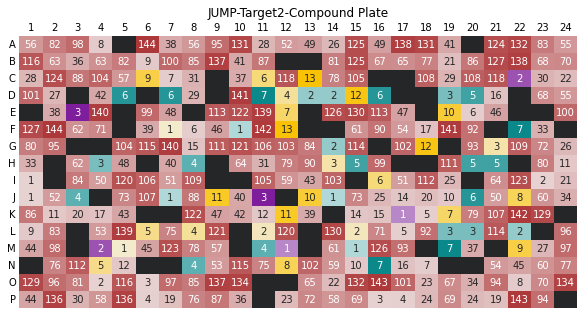

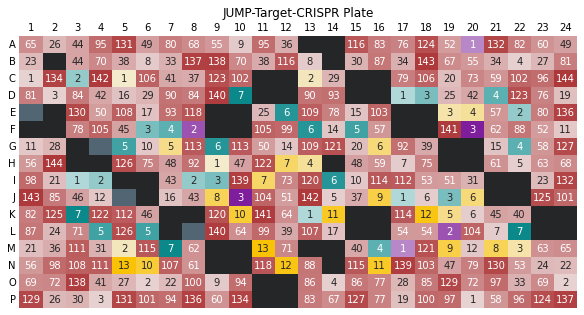

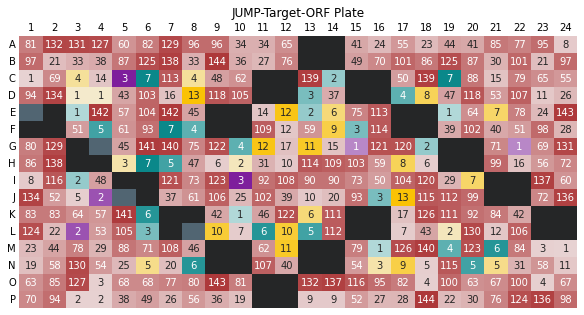

In [3]:
target_1_genes = pandas.read_csv('../profiles-cp-jump1/metadata/moa/cpjump1_compound_metadata.tsv',delimiter='\t')
target_1_platemap = pandas.read_csv('../profiles-cp-jump1/metadata/platemaps/2020_11_04_CPJUMP1/platemap/C-7210-01-CMP-013.txt',delimiter='\t')
target_2_genes = pandas.read_csv('../profiles-pilots/metadata/moa/JUMP-Target-2_compound_metadata.tsv',delimiter='\t')
target_2_platemap = pandas.read_csv('../profiles-pilots/metadata/platemaps/2021_04_20_Target2/platemap/JUMP-Target-2_compound_platemap.txt',delimiter='\t')
CRISPR_genes = pandas.read_csv('../profiles-cp-jump1/metadata/moa/cpjump1_crispr_metadata.tsv',delimiter='\t')
CRISPR_platemap = pandas.read_csv('../profiles-cp-jump1/metadata/platemaps/2020_11_04_CPJUMP1/platemap/DXH.92.93.94.95.A.txt',delimiter='\t')
ORF_genes = pandas.read_csv('../profiles-cp-jump1/metadata/moa/cpjump1_orf_metadata.tsv',delimiter='\t')
ORF_platemap = pandas.read_csv('../profiles-cp-jump1/metadata/platemaps/2020_11_04_CPJUMP1/platemap/DOG.30.31.32.33.A.txt',delimiter='\t')

target_map = {'JUMP-Target1-Compound':[target_1_genes,target_1_platemap,'target'],
'JUMP-Target2-Compound':[target_2_genes,target_2_platemap,'target'],
'JUMP-Target-CRISPR':[CRISPR_genes,CRISPR_platemap,'genes'],
'JUMP-Target-ORF':[ORF_genes,ORF_platemap,'genes']}

all_gene_targets = list(set(list(target_1_genes['target'])+list(target_2_genes['target'])+list(CRISPR_genes['genes'])+list(ORF_genes['genes'])))
all_gene_targets = [str(x) for x in all_gene_targets]
all_gene_targets.sort()

poscon_diverse_dict_compound={'BRD-K07881437-001-04-6': 0, 'BRD-K23363278-001-02-1': 0, 
'BRD-K38852836-001-02-1': 1, 'BRD-K42191735-001-08-7': 1, 'BRD-K58550667-001-08-7': 2, 
'BRD-K25412176-001-01-9': 2, 'BRD-K41599323-001-02-3': 3, 'BRD-K37764012-001-04-1': 3, 
'BRD-K03406345-001-21-1': 4, 'BRD-K49350383-001-13-7': 4, 'BRD-K64800655-001-09-0': 5, 
'BRD-K64890080-001-13-8': 5, 'BRD-K86525559-001-07-8': 6, 'BRD-K33882852-003-03-6': 6}

poscon_diverse_dict_gene={'RET': 0, 'TUBB': 0, 'HSP90AA1': 1, 
'PIK3CG': 1, 'NAMPT': 2, 'AKT1': 2, 'KRAS': 3, 'PAK4': 3, 'DNMT3A': 4, 
'IMPDH1': 4, 'CDK7': 5, 'PLK1': 5, 'CHEK2': 6, 'GABRB2': 6}

poscon_types = ['poscon_cp','poscon_orf']
poscon_cp_dict = {}
poscon_orf_dict = {}

cp_count = 0
orf_count = 0

for eachgenemap in target_map.keys():
    if 'Compound' not in eachgenemap:
        gene_df = target_map[eachgenemap][0]
        for each_poscon_type in poscon_types:
            poscon_genes = list(gene_df.query('control_type == @each_poscon_type')['genes'])
            for eachgene in poscon_genes:
                if each_poscon_type == 'poscon_cp':
                    if eachgene not in poscon_cp_dict.keys():
                        poscon_cp_dict[eachgene]=cp_count
                        cp_count += 1
                else:
                    if eachgene not in poscon_orf_dict.keys():
                        poscon_orf_dict[eachgene] = orf_count
                        orf_count += 1


unique_gene_targets = [x for x in all_gene_targets if x not in poscon_diverse_dict_gene.keys()]
unique_gene_targets = [x for x in unique_gene_targets if x not in poscon_cp_dict.keys()]
unique_gene_targets = [x for x in unique_gene_targets if x not in poscon_orf_dict.keys()]

gene_to_color_mapping = {}
gene_to_label_mapping = {0:'',1:''}
for eachgene in range(len(unique_gene_targets)):
    gene_to_color_mapping[unique_gene_targets[eachgene]]=30+eachgene
    gene_to_label_mapping[unique_gene_targets[eachgene]]=1+eachgene
for eachgene in poscon_diverse_dict_gene.keys():
    gene_to_color_mapping[eachgene]=poscon_diverse_dict_gene[eachgene]+229
    gene_to_label_mapping[eachgene]=poscon_diverse_dict_gene[eachgene]+1
for eachgene in poscon_cp_dict.keys():
    gene_to_color_mapping[eachgene]=poscon_cp_dict[eachgene]+238
    gene_to_label_mapping[eachgene]=poscon_cp_dict[eachgene]+1
for eachgene in poscon_orf_dict.keys():
    gene_to_color_mapping[eachgene]=poscon_orf_dict[eachgene]+253
    gene_to_label_mapping[eachgene]=poscon_orf_dict[eachgene]+1

cmap0 = sns.dark_palette("slate",input='xkcd',as_cmap=True) #DMSO
colors0 = cmap0(numpy.linspace(0., 1, 2))
cmap2 = sns.light_palette("blood red",input='xkcd',as_cmap=True) #Genes
colors2 = cmap2(numpy.linspace(0., 1, 225))
cmap3 = sns.light_palette("dark cyan",input='xkcd',as_cmap=True) #Poscon_diverse
colors3 = cmap3(numpy.linspace(0., 1, 9))
cmap4 = sns.light_palette("goldenrod",input='xkcd',as_cmap=True) #Poscon_cp
colors4 = cmap4(numpy.linspace(0., 1, 15))
cmap5 = sns.light_palette("purple",input='xkcd',as_cmap=True) #Poscon_orf
colors5 = cmap5(numpy.linspace(0., 1, 5))
colors = numpy.vstack((colors0, colors2,colors3,colors4,colors5))
cmap = mcolors.LinearSegmentedColormap.from_list('cmap', colors)

for eachtarget in list(target_map.keys()):
    plate_df = target_map[eachtarget][1].fillna('null')
    gene_df = target_map[eachtarget][0].fillna('null')
    full_df = pandas.merge(plate_df,gene_df,how='left',on='broad_sample')
    target_key = target_map[eachtarget][2]
    plate = numpy.array(range(384)).astype('str')
    labels = numpy.array(range(384)).astype('str')
    for eachwell in range(384):
        if full_df['pert_type'][eachwell] in ['control','null']:
            if full_df['control_type'][eachwell] in ['negcon','null']:
                labels[eachwell] = ''
                if target_key == 'target': #compound plate
                    plate[eachwell] = 0
                else:
                    if full_df['broad_sample'][eachwell]=='null':
                        plate[eachwell] = 1
                    else:
                        plate[eachwell] = 0
            else:
                plate[eachwell] = gene_to_color_mapping[full_df[target_key][eachwell]]
                labels[eachwell] = gene_to_label_mapping[full_df[target_key][eachwell]]
        else:
            plate[eachwell] = gene_to_color_mapping[full_df[target_key][eachwell]]
            labels[eachwell] = gene_to_label_mapping[full_df[target_key][eachwell]]
    plate = plate.astype('uint8')

    plate = plate.reshape([16,24])
    labels = labels.reshape([16,24])

    Rows = list(string.ascii_uppercase)[:16]
    plate_df_dict = {}
    for eachcol in range(24):
        plate_df_dict[eachcol+1] = plate[:,eachcol]
    plate_df_dict['Rows']=Rows

    plate_df = pandas.DataFrame(plate_df_dict)
    plate_df = plate_df.set_index('Rows')

    fig, ax = plt.subplots(figsize=(10, 5))
    g = sns.heatmap(plate_df,cmap=cmap,cbar=False,ax=ax,annot=labels,fmt='')
    g.set_yticklabels(g.get_yticklabels(), rotation=0, horizontalalignment='right')
    g.set_ylabel('')
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    ax.tick_params(length=0)
    ax.set_title(f'{eachtarget} Plate')
    plt.savefig(f'../figures/{eachtarget}.png',dpi=300)
                    

    